In [21]:
import numpy as np
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt
plt.rc('text',usetex=False)
plt.rc('font',family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14) 
%matplotlib inline

In [22]:
data = np.genfromtxt('supernovaDistanceRedshiftgit.csv',delimiter=',',dtype='float',skip_header=1)

In [23]:
distance = data[:,1] * u.Unit('Mpc')
z = data[:,2] * const.c
dz = data[:,3] * const.c

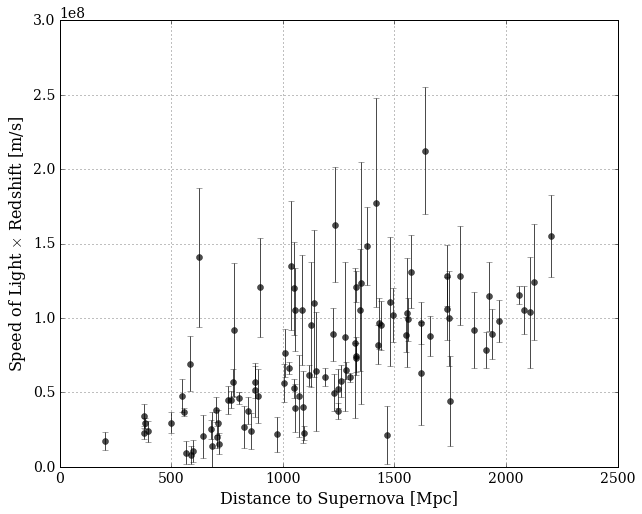

In [48]:
plt.errorbar(distance.value,z.value,yerr=dz.value,fmt='o',color='black',alpha=0.7)
plt.ylim(0,3e8)
plt.xlim(0,2500)
plt.xlabel('Distance to Supernova [Mpc]',fontsize=16)
plt.ylabel(r'Speed of Light $\times$ Redshift [m/s]',fontsize=16)
plt.gcf().set_size_inches(10,8)
plt.grid()


In [49]:
def OLSfit(x, y, dy=None):
    """Find the best fitting parameters of a linear fit to the data through the 
    method of ordinary least squares estimation. (i.e. find m and b for 
    y = m*x + b)
    
    Args:
        x: Numpy array of independent variable data
        y: Numpy array of dependent variable data. Must have same size as x.
        dy: Numpy array of dependent variable standard deviations. Must be same 
            size as y.

    Returns: A list with four floating point values. [m, dm, b, db]
    """
    if dy is None:
        #if no error bars, weight every point the same
        dy = np.ones(x.size)
    denom = np.sum(1 / dy**2) * np.sum((x / dy)**2) - (np.sum(x / dy**2))**2
    m = (np.sum(1 / dy**2) * np.sum(x * y / dy**2) - 
         np.sum(x / dy**2) * np.sum(y / dy**2)) / denom
    b = (np.sum(x**2 / dy**2) * np.sum(y / dy**2) - 
         np.sum(x / dy**2) * np.sum(x * y / dy**2)) / denom
    dm = np.sqrt(np.sum(1 / dy**2) / denom)
    db = np.sqrt(np.sum(x / dy**2) / denom)
    return([m, dm, b, db])

In [50]:
bestfit = OLSfit(distance,z,dz)
print(bestfit)
slope = bestfit[0]
intercept = bestfit[2]

[<Quantity 48981.78107496815 m / (Mpc s)>, <Quantity 2155.740025498166 m / (Mpc s)>, <Quantity 2417784.361950814 m / s>, <Quantity 64820.877927540096 m / (Mpc(1/2) s)>]


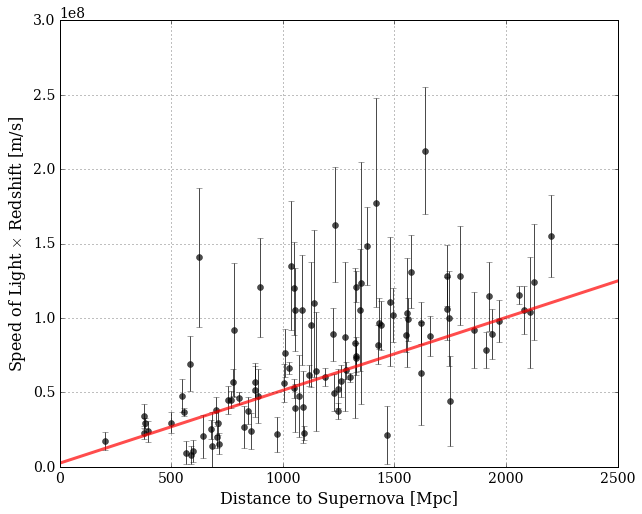

In [51]:
plt.errorbar(distance.value,z.value,yerr=dz.value,fmt='o',color='black',alpha=0.7)
plt.ylim(0,3e8)
plt.xlim(0,2500)
plt.xlabel('Distance to Supernova [Mpc]',fontsize=16)
plt.ylabel(r'Speed of Light $\times$ Redshift [m/s]',fontsize=16)
plt.gcf().set_size_inches(10,8)
plt.plot(np.arange(0,2500,1),slope.value*np.arange(0,2500,1)+intercept.value,\
        color='red',lw=3,alpha=0.7,label='Least Squares Fit')
plt.grid()

In [52]:
H0 = bestfit[0].to('km/s/Mpc')
dH0 = bestfit[1].to('km/s/Mpc')
print H0,'+/-',dH0

48.981781075 km / (Mpc s) +/- 2.1557400255 km / (Mpc s)


The bestfit line to the supernova data gives a value for $H_0$, the expansion rate of the universe, of $H_0=49\pm2$ km/s/Mpc. The Planck mission measured fluctuations in the cosmic microwave background to obtain a value of $H_0=67.80\pm0.77$ km/s/Mpc (https://arxiv.org/abs/1303.5062) The result derived from this supernova dataset disagrees with the much more precise Planck value. This discrepancy is likely caused by the large uncertainties associated with the measurements of redshift for the supernovae and the fact that the sample is relatively small. The value calculated here is, however, inconsistent with a static or contracting universe, and supports the observation that the universe is expanding.